In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.svm import SVC

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.metrics import  classification_report

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.model_selection import ShuffleSplit

In [12]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [13]:
df=pd.read_csv('./creditcard.csv')

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.shape

(284807, 31)

In [16]:
df.dropna(inplace=True)
# no null values

In [17]:
df.shape

(284807, 31)

## Check for correlation or feature selection

In [18]:
x = df.iloc[:,0:30]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [19]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
print(model.feature_importances_)

[0.01769406 0.01200509 0.0116862  0.02938175 0.03841897 0.01381216
 0.01385964 0.0247798  0.01322878 0.02941818 0.06215647 0.06849216
 0.13070699 0.01165962 0.10774983 0.01251008 0.06977813 0.15416689
 0.03769032 0.01455308 0.01250121 0.01534016 0.0122691  0.00916404
 0.01134085 0.01125367 0.01428717 0.0138591  0.01277923 0.01345726]


In [23]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=False)

V17       0.154167
V12       0.130707
V14       0.107750
V16       0.069778
V11       0.068492
V10       0.062156
V4        0.038419
V18       0.037690
V9        0.029418
V3        0.029382
V7        0.024780
Time      0.017694
V21       0.015340
V19       0.014553
V26       0.014287
V6        0.013860
V27       0.013859
V5        0.013812
Amount    0.013457
V8        0.013229
V28       0.012779
V15       0.012510
V20       0.012501
V22       0.012269
V1        0.012005
V2        0.011686
V13       0.011660
V24       0.011341
V25       0.011254
V23       0.009164
dtype: float64

In [24]:
correlation=df.corr()
print(correlation['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [25]:
#best feature with correlation
df1=df[['V12','V17','V18','V10','V11','V14','V16','V9','V3','V4','V7','V1','V5','V6','V2','V27','V8','V20','V19','V21','Time','Class']]
df1

,V12,V17,V18,V10,V11,V14,V16,V9,V3,V4,...,V5,V6,V2,V27,V8,V20,V19,V21,Time,Class
0,-0.617801,0.207971,0.025791,0.090794,-0.551600,-0.311169,-0.470401,0.363787,2.536347,1.378155,...,-0.338321,0.462388,-0.072781,0.133558,0.098698,0.251412,0.403993,-0.018307,0.0,0
1,1.065235,-0.114805,-0.183361,-0.166974,1.612727,-0.143772,0.463917,-0.255425,0.166480,0.448154,...,0.060018,-0.082361,0.266151,-0.008983,0.085102,-0.069083,-0.145783,-0.225775,0.0,0
2,0.066084,1.109969,-0.121359,0.207643,0.624501,-0.165946,-2.890083,-1.514654,1.773209,0.379780,...,-0.503198,1.800499,-1.340163,-0.055353,0.247676,0.524980,-2.261857,0.247998,1.0,0
3,0.178228,-0.684093,1.965775,-0.054952,-0.226487,-0.287924,-1.059647,-1.387024,1.792993,-0.863291,...,-0.010309,1.247203,-0.185226,0.062723,0.377436,-0.208038,-1.232622,-0.108300,1.0,0
4,0.538196,-0.237033,-0.038195,0.753074,-0.822843,-1.119670,-0.451449,0.817739,1.548718,0.403034,...,-0.407193,0.095921,0.877737,0.219422,-0.270533,0.408542,0.803487,-0.009431,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.711941,1.991691,0.510632,4.356170,-1.593105,4.626942,1.107641,1.914428,-9.834783,-2.066656,...,-5.364473,-2.606837,10.071785,0.943651,7.305334,1.475829,-0.682920,0.213454,172786.0,0
284803,0.915802,-0.025693,-1.221179,-0.975926,-0.150189,-0.675143,-0.711757,0.584800,2.035030,-0.738589,...,0.868229,1.058415,-0.055080,0.068472,0.294869,0.059616,-1.545556,0.214205,172787.0,0
284804,0.063119,0.313502,0.395652,-0.484782,0.411614,-0.510602,0.140716,0.432454,-3.249640,-0.557828,...,2.630515,3.031260,-0.301254,0.004455,0.708417,0.001396,-0.577252,0.232045,172788.0,0
284805,-0.962886,0.509928,1.113981,-0.399126,-1.933849,0.449624,-0.608577,0.392087,0.702510,0.689799,...,-0.377961,0.623708,0.530483,0.108821,0.679145,0.127434,2.897849,0.265245,172788.0,0


## Check for outliers 

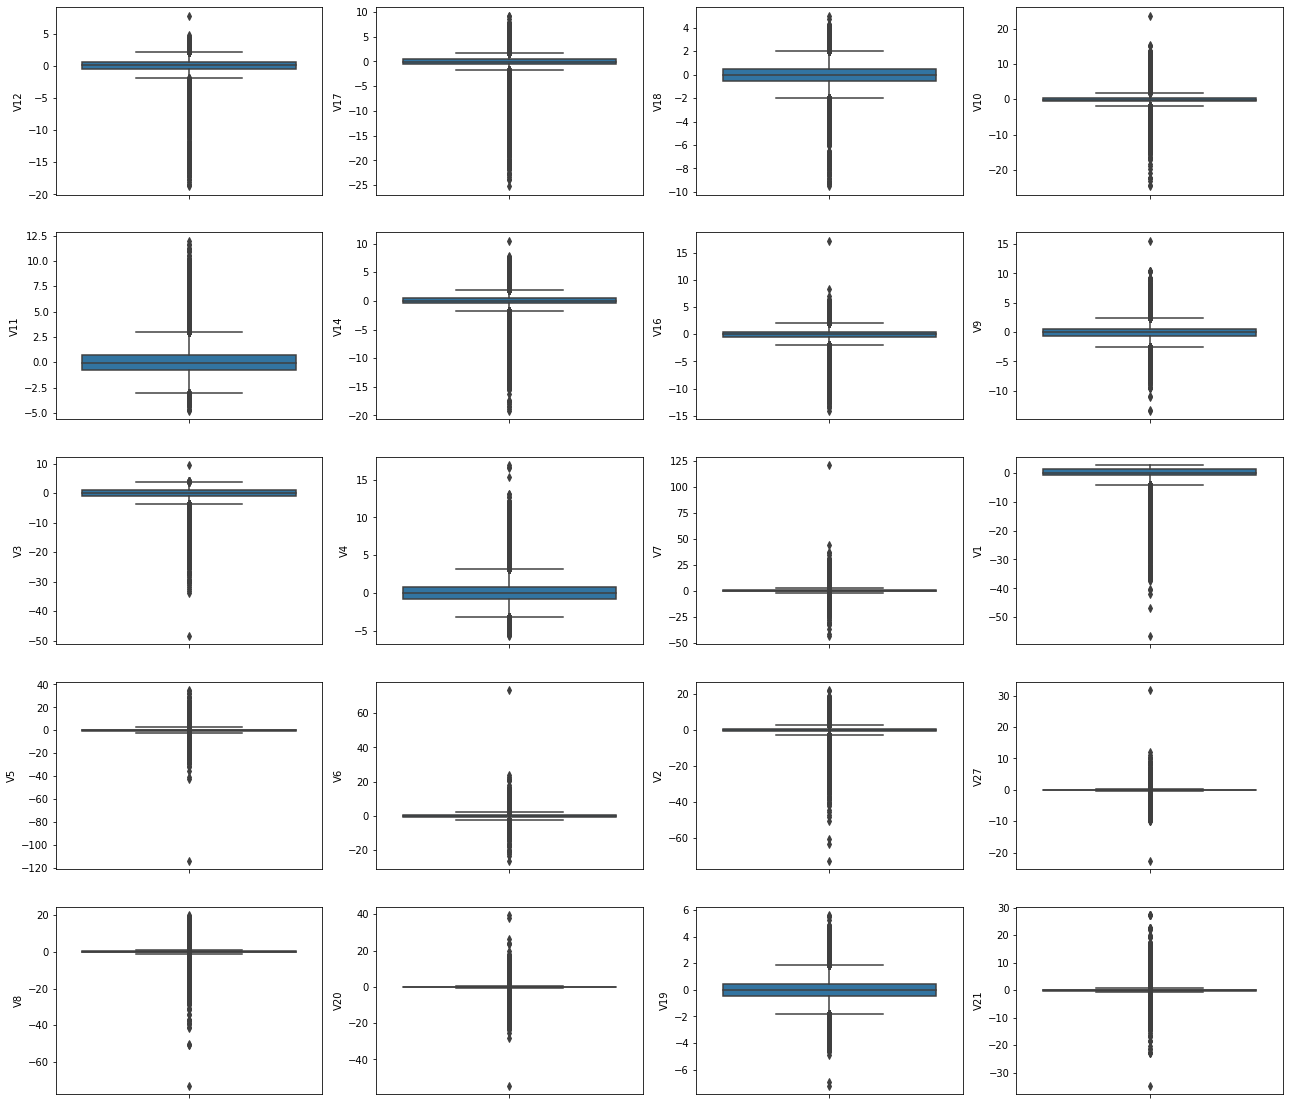

In [26]:
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(22,20))
sns.boxplot(data=df1,y='V12',ax=ax[0][0])
sns.boxplot(data=df1,y='V17',ax=ax[0][1])
sns.boxplot(data=df1,y='V18',ax=ax[0][2])
sns.boxplot(data=df1,y='V10',ax=ax[0][3])
sns.boxplot(data=df1,y='V11',ax=ax[1][0])
sns.boxplot(data=df1,y='V14',ax=ax[1][1])
sns.boxplot(data=df1,y='V16',ax=ax[1][2])
sns.boxplot(data=df1,y='V9',ax=ax[1][3])
sns.boxplot(data=df1,y='V3',ax=ax[2][0])
sns.boxplot(data=df1,y='V4',ax=ax[2][1])
sns.boxplot(data=df1,y='V7',ax=ax[2][2])
sns.boxplot(data=df1,y='V1',ax=ax[2][3])
sns.boxplot(data=df1,y='V5',ax=ax[3][0])
sns.boxplot(data=df1,y='V6',ax=ax[3][1])
sns.boxplot(data=df1,y='V2',ax=ax[3][2])
sns.boxplot(data=df1,y='V27',ax=ax[3][3])
sns.boxplot(data=df1,y='V8',ax=ax[4][0])
sns.boxplot(data=df1,y='V20',ax=ax[4][1])
sns.boxplot(data=df1,y='V19',ax=ax[4][2])
sns.boxplot(data=df1,y='V21',ax=ax[4][3])

## Removing the outliers 

### Droping outliers of V12

In [27]:
quantile1, quantile3= np.percentile(df1['V12'],[25,75])
print(quantile1)
print(quantile3)

-0.40557148544041355
0.6182380329461361


In [28]:
iqr=quantile3-quantile1
iqr

1.0238095183865497

In [29]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.4770000406000623
3.6896665881057853


In [30]:
df1.drop(df1[df1['V12']>ub].index,axis=0,inplace=True)

/home/s0umyajit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df1.shape

(284745, 22)

In [32]:
df1.drop(df1[df1['V12']<lb].index,axis=0,inplace=True)
df1.shape

(283502, 22)

### Droping outliers of V10

In [33]:
quantile1, quantile3= np.percentile(df1['V10'],[25,75])
print(quantile1)
print(quantile3)

-0.5329420709457295
0.454234850440027


In [34]:
iqr=quantile3-quantile1
iqr

0.9871769213857565

In [35]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.494472835102999
3.4157656145972966


In [36]:
df1.drop(df1[df1['V10']>ub].index,axis=0,inplace=True)

In [37]:
df1.shape

(280889, 22)

In [38]:
df1.drop(df1[df1['V10']<lb].index,axis=0,inplace=True)
df1.shape

(280684, 22)

 ### Droping outliers of V3

In [39]:
quantile1,quantile3=np.percentile(df1['V3'],[25,75])
print(quantile1)
print(quantile3)

-0.864518612980335
1.03161069632272


In [40]:
iqr=quantile3-quantile1
iqr

1.8961293093030551

In [41]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-6.5529065408895
6.719998624231885


In [42]:
df1.drop(df1[df1['V3']<lb].index,axis=0,inplace=True)

In [43]:
df1.shape

(280308, 22)

### Droping outliers of V16

In [44]:
quantile1, quantile3= np.percentile(df1['V16'],[25,75])
print(quantile1)
print(quantile3)

-0.46064840689351705
0.5221471351789807


In [45]:
iqr=quantile3-quantile1
iqr

0.9827955420724978

In [46]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.40903503311101
3.470533761396474


In [47]:
df1.drop(df1[df1['V16']>ub].index,axis=0,inplace=True)

In [48]:
df1.drop(df1[df1['V16']<lb].index,axis=0,inplace=True)

In [49]:
df1.shape

(280092, 22)

### Droping outliers of V9

In [50]:
quantile1, quantile3= np.percentile(df1['V9'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.6474019431487315
0.5743459080204465
1.221747851169178
-4.312645496656265
4.239589461527981


In [51]:
df1.drop(df1[df1['V9']>ub].index,axis=0,inplace=True)
df1.shape

(280012, 22)

In [52]:
df1.drop(df1[df1['V9']<lb].index,axis=0,inplace=True)
df1.shape

(280011, 22)

### Droping outliers of V17

In [53]:
quantile1, quantile3= np.percentile(df1['V17'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.4796270525012605
0.3951250463403195
0.87475209884158
-3.1038833490260003
3.019381342865059


In [54]:
df1.drop(df1[df1['V17']>ub].index,axis=0,inplace=True)
df1.shape

(279174, 22)

In [55]:
df1.drop(df1[df1['V17']<lb].index,axis=0,inplace=True)
df1.shape

(279144, 22)

### Droping outliers of V4

In [56]:
quantile1, quantile3= np.percentile(df1['V4'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.8381042686817366
0.7302376077647813
1.5683418764465178
-5.543129898021291
5.435263237104335


In [57]:
df1.drop(df1[df1['V4']>ub].index,axis=0,inplace=True)
df1.shape

(278983, 22)

### Droping outliers V1

In [58]:
quantile1, quantile3= np.percentile(df1['V1'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.8824079138235621
1.3274340103682198
2.2098419241917817
-7.5119336863989075
7.956959782943565


In [59]:
df1.drop(df1[df1['V1']<lb].index,axis=0,inplace=True)

###  Droping outliers V5

In [60]:
quantile1, quantile3= np.percentile(df1['V5'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.6801687533012373
0.605474483377105
1.2856432366783421
-4.537098463336264
4.462404193412131


In [61]:
df1.drop(df1[df1['V5']<lb].index,axis=0,inplace=True)

In [62]:
df1.drop(df1[df1['V5']>ub].index,axis=0,inplace=True)

### Droping Outlier of V8

In [63]:
quantile1, quantile3= np.percentile(df1['V8'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.20349428859025573
0.31935908310385624
0.522853371694112
-1.7720544036725916
1.887919198186192


In [64]:
df1.drop(df1[df1['V8']<lb].index,axis=0,inplace=True)

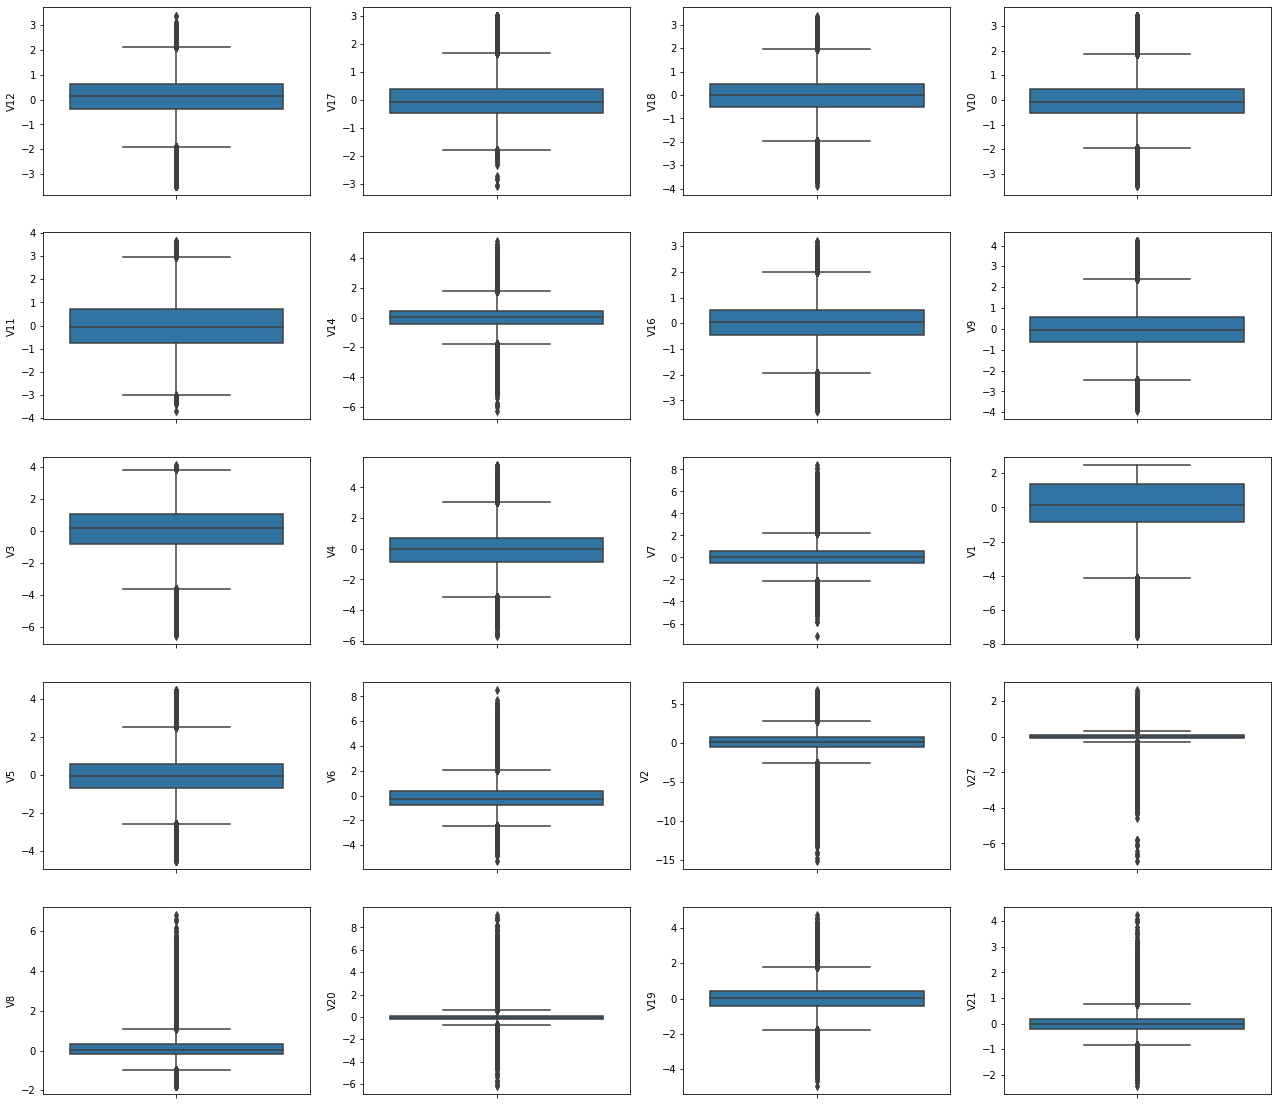

In [65]:
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(22,20))
sns.boxplot(data=df1,y='V12',ax=ax[0][0])
sns.boxplot(data=df1,y='V17',ax=ax[0][1])
sns.boxplot(data=df1,y='V18',ax=ax[0][2])
sns.boxplot(data=df1,y='V10',ax=ax[0][3])
sns.boxplot(data=df1,y='V11',ax=ax[1][0])
sns.boxplot(data=df1,y='V14',ax=ax[1][1])
sns.boxplot(data=df1,y='V16',ax=ax[1][2])
sns.boxplot(data=df1,y='V9',ax=ax[1][3])
sns.boxplot(data=df1,y='V3',ax=ax[2][0])
sns.boxplot(data=df1,y='V4',ax=ax[2][1])
sns.boxplot(data=df1,y='V7',ax=ax[2][2])
sns.boxplot(data=df1,y='V1',ax=ax[2][3])
sns.boxplot(data=df1,y='V5',ax=ax[3][0])
sns.boxplot(data=df1,y='V6',ax=ax[3][1])
sns.boxplot(data=df1,y='V2',ax=ax[3][2])
sns.boxplot(data=df1,y='V27',ax=ax[3][3])
sns.boxplot(data=df1,y='V8',ax=ax[4][0])
sns.boxplot(data=df1,y='V20',ax=ax[4][1])
sns.boxplot(data=df1,y='V19',ax=ax[4][2])
sns.boxplot(data=df1,y='V21',ax=ax[4][3])

In [66]:
df1.shape

(269923, 22)

In [67]:
df1['Class'].value_counts()

0    269854
1        69
Name: Class, dtype: int64

In [68]:
df1.head()

,V12,V17,V18,V10,V11,V14,V16,V9,V3,V4,...,V5,V6,V2,V27,V8,V20,V19,V21,Time,Class
0,-0.617801,0.207971,0.025791,0.090794,-0.551600,-0.311169,-0.470401,0.363787,2.536347,1.378155,...,-0.338321,0.462388,-0.072781,0.133558,0.098698,0.251412,0.403993,-0.018307,0.0,0
1,1.065235,-0.114805,-0.183361,-0.166974,1.612727,-0.143772,0.463917,-0.255425,0.166480,0.448154,...,0.060018,-0.082361,0.266151,-0.008983,0.085102,-0.069083,-0.145783,-0.225775,0.0,0
2,0.066084,1.109969,-0.121359,0.207643,0.624501,-0.165946,-2.890083,-1.514654,1.773209,0.379780,...,-0.503198,1.800499,-1.340163,-0.055353,0.247676,0.524980,-2.261857,0.247998,1.0,0
3,0.178228,-0.684093,1.965775,-0.054952,-0.226487,-0.287924,-1.059647,-1.387024,1.792993,-0.863291,...,-0.010309,1.247203,-0.185226,0.062723,0.377436,-0.208038,-1.232622,-0.108300,1.0,0
4,0.538196,-0.237033,-0.038195,0.753074,-0.822843,-1.119670,-0.451449,0.817739,1.548718,0.403034,...,-0.407193,0.095921,0.877737,0.219422,-0.270533,0.408542,0.803487,-0.009431,2.0,0


In [69]:
df1.shape

(269923, 22)

In [70]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Perfoming Upsampling as it is a unbalanced dataset 

In [71]:
x=df1.drop('Class',axis=1)
x

,V12,V17,V18,V10,V11,V14,V16,V9,V3,V4,...,V1,V5,V6,V2,V27,V8,V20,V19,V21,Time
0,-0.617801,0.207971,0.025791,0.090794,-0.551600,-0.311169,-0.470401,0.363787,2.536347,1.378155,...,-1.359807,-0.338321,0.462388,-0.072781,0.133558,0.098698,0.251412,0.403993,-0.018307,0.0
1,1.065235,-0.114805,-0.183361,-0.166974,1.612727,-0.143772,0.463917,-0.255425,0.166480,0.448154,...,1.191857,0.060018,-0.082361,0.266151,-0.008983,0.085102,-0.069083,-0.145783,-0.225775,0.0
2,0.066084,1.109969,-0.121359,0.207643,0.624501,-0.165946,-2.890083,-1.514654,1.773209,0.379780,...,-1.358354,-0.503198,1.800499,-1.340163,-0.055353,0.247676,0.524980,-2.261857,0.247998,1.0
3,0.178228,-0.684093,1.965775,-0.054952,-0.226487,-0.287924,-1.059647,-1.387024,1.792993,-0.863291,...,-0.966272,-0.010309,1.247203,-0.185226,0.062723,0.377436,-0.208038,-1.232622,-0.108300,1.0
4,0.538196,-0.237033,-0.038195,0.753074,-0.822843,-1.119670,-0.451449,0.817739,1.548718,0.403034,...,-1.158233,-0.407193,0.095921,0.877737,0.219422,-0.270533,0.408542,0.803487,-0.009431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.190916,0.070441,0.373110,-0.657422,0.644837,-0.731707,0.599628,-0.204064,-0.546012,-0.745097,...,0.120316,1.130314,-0.235973,0.931005,0.217940,0.115093,0.000676,0.128904,-0.314205,172785.0
284803,0.915802,-0.025693,-1.221179,-0.975926,-0.150189,-0.675143,-0.711757,0.584800,2.035030,-0.738589,...,-0.732789,0.868229,1.058415,-0.055080,0.068472,0.294869,0.059616,-1.545556,0.214205,172787.0
284804,0.063119,0.313502,0.395652,-0.484782,0.411614,-0.510602,0.140716,0.432454,-3.249640,-0.557828,...,1.919565,2.630515,3.031260,-0.301254,0.004455,0.708417,0.001396,-0.577252,0.232045,172788.0
284805,-0.962886,0.509928,1.113981,-0.399126,-1.933849,0.449624,-0.608577,0.392087,0.702510,0.689799,...,-0.240440,-0.377961,0.623708,0.530483,0.108821,0.679145,0.127434,2.897849,0.265245,172788.0


In [72]:
y=df1['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 269923, dtype: int64

In [73]:
sm=SMOTE(random_state=42)

In [74]:
x_new,y_new=sm.fit_resample(x,y)

In [75]:
x_new.shape
# done with oversampling

(539708, 21)

## Feature Scaling

In [76]:
sc=StandardScaler()

In [77]:
X=sc.fit_transform(x_new)
X

array([[-0.26907431,  0.0660824 , -0.23962561, ...,  0.58319709,
        -0.22439533, -1.97622112],
       [ 1.37934064, -0.28087629, -0.53711434, ..., -0.01598612,
        -0.87899122, -1.97622112],
       [ 0.40074225,  1.03565939, -0.44892538, ..., -2.3222273 ,
         0.61583892, -1.97620038],
       ...,
       [ 0.34157661, -0.29062699,  0.73235691, ...,  0.63721965,
         3.76502194,  0.91593401],
       [-1.91136706, -0.65108782,  0.38054865, ...,  0.96998772,
         0.95392523,  0.72322473],
       [-0.35830108,  0.08617242,  0.20521384, ..., -1.03261561,
        -0.20801551, -0.41719256]])

## Applying ML algorithms

In [78]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [79]:
print(cross_val_score(LogisticRegression(),X,y_new,scoring='accuracy',cv=cv))

[0.89345513 0.89335013 0.89343042 0.89358483 0.8938504  0.8927881
 0.89354777 0.89322043 0.89264605 0.89391216]


In [80]:
print(cross_val_score(LogisticRegression(),X,y_new,scoring='accuracy',cv=cv).mean())

0.8933785427976753


### Logistic Regression Model

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,y_new,test_size=0.3,random_state=42)

In [82]:
model=LogisticRegression()

In [83]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [85]:
model.score(x_train,y_train)

0.8932145740414775

In [86]:
confusion_matrix(prediction,y_test)

array([[73409,  9569],
       [ 7682, 71253]])

In [87]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     82978
           1       0.88      0.90      0.89     78935

    accuracy                           0.89    161913
   macro avg       0.89      0.89      0.89    161913
weighted avg       0.89      0.89      0.89    161913



### Hyperparameter Tunning of Logistic Regression

In [88]:
from sklearn.model_selection import GridSearchCV

In [111]:
params={'C':[0.1,0.01,0.001,1.0,10.0,100.0,1000.0]}

In [112]:
grid_search=GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=cv,
                        scoring='accuracy')

In [113]:
grid_search=grid_search.fit(X,y_new)

In [114]:
accuracy=grid_search.best_score_

In [115]:
accuracy

0.8936175600476799

In [116]:
grid_search.best_params_

{'C': 1000.0}

In [105]:
print(cross_val_score(LogisticRegression(C=1000),X,y_new,scoring='accuracy',cv=cv))

[0.89373923 0.89357865 0.89375158 0.89381334 0.89398628 0.89307221
 0.89381334 0.89352306 0.89286839 0.89402951]


In [106]:
print(cross_val_score(LogisticRegression(C=1000),X,y_new,scoring='accuracy',cv=cv).mean())

0.8936175600476799


### Random Forest Classifier Model

In [285]:
model=RandomForestClassifier()

In [286]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [293]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [295]:
model.score(x_train,y_train)

1.0

In [296]:
confusion_matrix(prediction,y_test)

array([[81079,     0],
       [   12, 80822]])

In [297]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81079
           1       1.00      1.00      1.00     80834

    accuracy                           1.00    161913
   macro avg       1.00      1.00      1.00    161913
weighted avg       1.00      1.00      1.00    161913



## Accuracy of model is 99.9%